# Non-Dominated Sorting Genetic Algorithm

In [ ]:
import numpy as np

from pymoo.optimize import minimize
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.visualization.scatter import Scatter

from modules.plotter import print_result
from modules.golomb_problem import init_simple_problem, init_medium_problem, init_hard_problem

## 1 obiettivo

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -
     2 |      200 |      1 |  0.000000E+00 |             f
     3 |      300 |      2 |  0.000000E+00 |             f
     4 |      400 |      4 |  0.000000E+00 |             f
     5 |      500 |      1 |  0.0181405896 |         ideal
     6 |      600 |      2 |  0.000000E+00 |             f
     7 |      700 |      1 |  0.0090702948 |         ideal
     8 |      800 |      2 |  0.000000E+00 |             f
     9 |      900 |      1 |  0.0272108844 |         ideal
    10 |     1000 |      1 |  0.000000E+00 |             f
    11 |     1100 |      2 |  0.000000E+00 |             f
    12 |     1200 |      1 |  0.0090702948 |         ideal
    13 |     1300 |      1 |  0.000000E+00 |             f
    14 |     1400 |      1 |  0.000000E+00 |             f
    15 |     1500 |      1 |  0.0045351474 |         ideal
    16 |     1600 |      2 |  0.000000E+00 |            

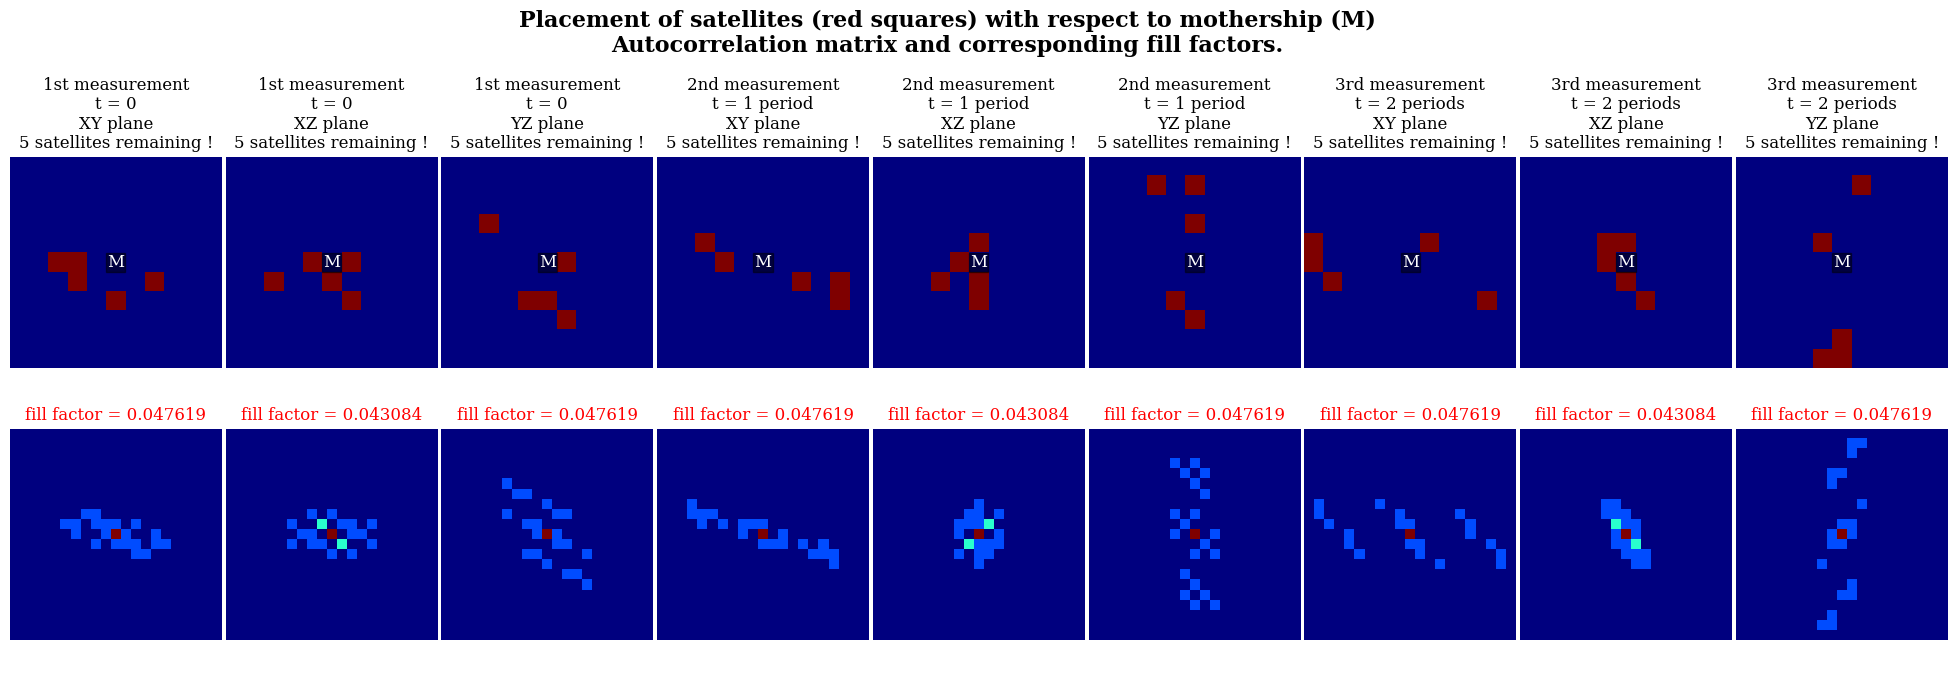

---

XY


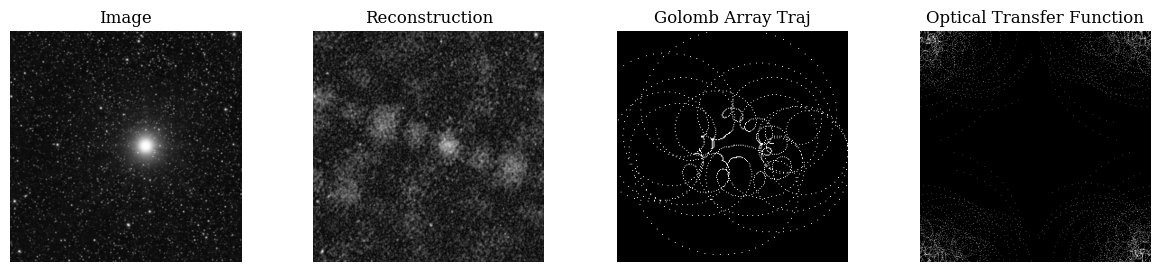

XZ


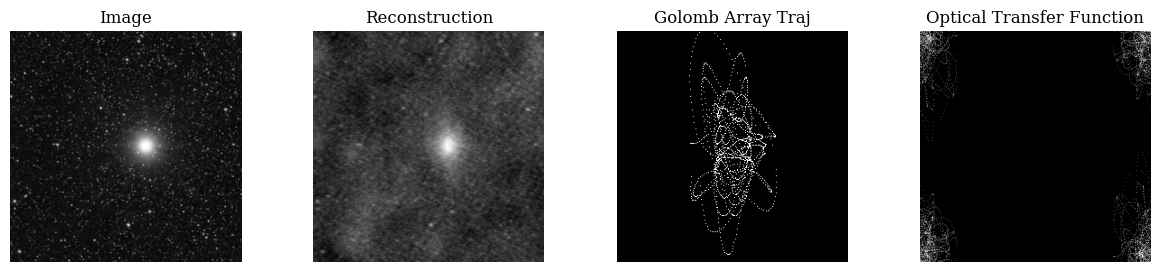

YZ


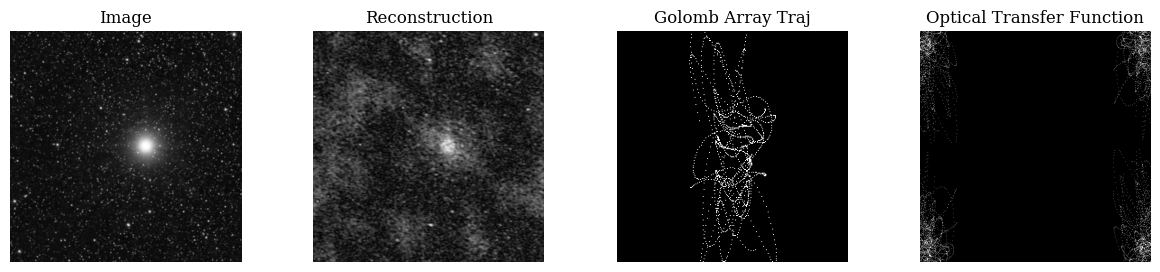

---

XY


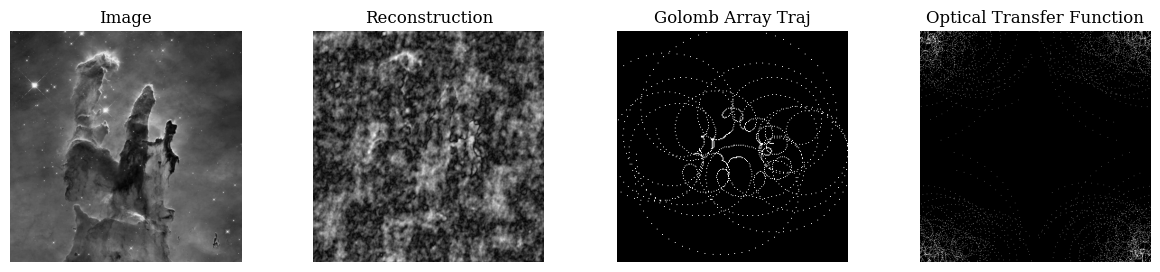

XZ


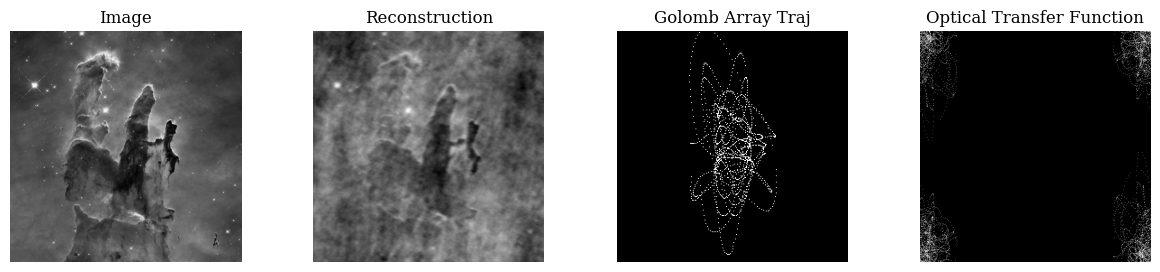

YZ


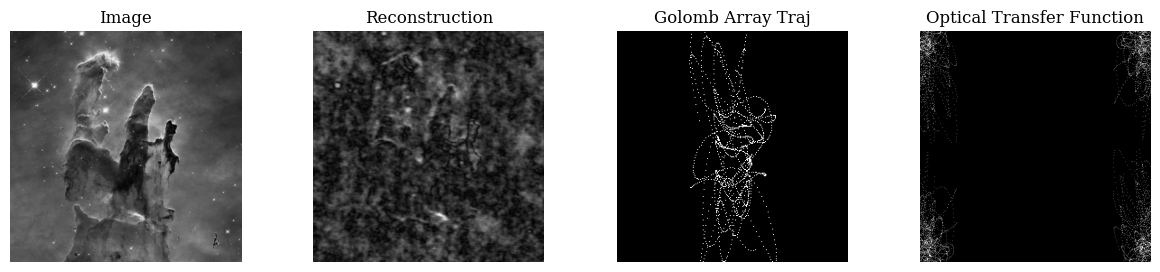

In [10]:
UDP = init_simple_problem()

# Classe per il problema di ottimizzazione con NSGA-II
class GolombOptimization(Problem):
    def __init__(self, udp):
        super().__init__(n_var=udp.n_sat * 6,  # numero di variabili: posizioni e velocità
                         n_obj=1,              # un solo obiettivo
                         n_constr=0,           # nessun vincolo
                         xl=-0.5,              # limite inferiore
                         xu=0.5)               # limite superiore
        self.udp = udp

    def _evaluate(self, x, out, *args, **kwargs):
        """
        Calcola il fitness per ogni soluzione
        """
        fitness_values = []
        for solution in x:
            fitness = self.udp.fitness(solution)[0]  # Utilizziamo la funzione di fitness preesistente in UDP
            fitness_values.append(fitness)
        out["F"] = np.array(fitness_values).reshape(-1, 1)  # Restituisce il fitness

def run_and_display_nsga2(udp, n_generations=100, population_size=100):
    """
    Configura, esegue l'algoritmo NSGA-II e visualizza i risultati
    """
    # Configura il problema
    problem = GolombOptimization(udp)

    # Configura l'algoritmo NSGA-II
    algorithm = NSGA2(
        pop_size=population_size,
        crossover_probability=0.9,  # Aumentiamo la probabilità di crossover
        mutation_probability=0.2,   # Probabilità di mutazione
        mutation_type="polynomial",  # Tipo di mutazione
        crossover_type="uniform",   # Tipo di crossover
        eliminate_duplicates=True   # Elimina duplicati per migliorare la diversità
    )

    # Condizioni di terminazione
    termination = ('n_gen', n_generations)

    # Esegui l'ottimizzazione
    res = minimize(problem, algorithm, termination, seed=1, verbose=True)

    # Visualizza tutte le soluzioni trovate
    print("\nTutte le soluzioni trovate (Fronte di Pareto):\n")
    for i, (sol, fit) in enumerate(zip(res.X, res.F)):
        print(f"Soluzione {i + 1}:")
        print(f"X = {sol}")
        print(f"Fitness = {fit[0]:.4f}\n")

    # Seleziona la migliore soluzione
    best_solution_idx = np.argmax(-res.F[:, 0])
    best_solution = res.X[best_solution_idx]
    best_fitness = -res.F[best_solution_idx, 0]

    print("\nMigliore soluzione trovata:")
    print(f"X = {best_solution}")
    print(f"Valore fitness = {best_fitness:.4f}")

    # Visualizza i risultati con print_result
    print_result(udp, best_solution, 300, show_simulated_reconstruction=True)

    # Visualizza il fronte di Pareto
    plot = Scatter()
    plot.add(res.F, label="Fronte di Pareto")
    plot.show()

# Esegui il codice principale
if __name__ == "__main__":
    # Esegui l'ottimizzazione e visualizza i risultati
    run_and_display_nsga2(UDP, n_generations=200, population_size=100)
    

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -
     2 |      200 |      1 |  0.000000E+00 |             f
     3 |      300 |      2 |  0.000000E+00 |             f
     4 |      400 |      4 |  0.000000E+00 |             f
     5 |      500 |      1 |  0.0181405896 |         ideal
     6 |      600 |      2 |  0.000000E+00 |             f
     7 |      700 |      1 |  0.0090702948 |         ideal
     8 |      800 |      2 |  0.000000E+00 |             f
     9 |      900 |      1 |  0.0272108844 |         ideal
    10 |     1000 |      1 |  0.000000E+00 |             f
    11 |     1100 |      2 |  0.000000E+00 |             f
    12 |     1200 |      1 |  0.0090702948 |         ideal
    13 |     1300 |      1 |  0.000000E+00 |             f
    14 |     1400 |      1 |  0.000000E+00 |             f
    15 |     1500 |      1 |  0.0045351474 |         ideal
    16 |     1600 |      2 |  0.000000E+00 |            

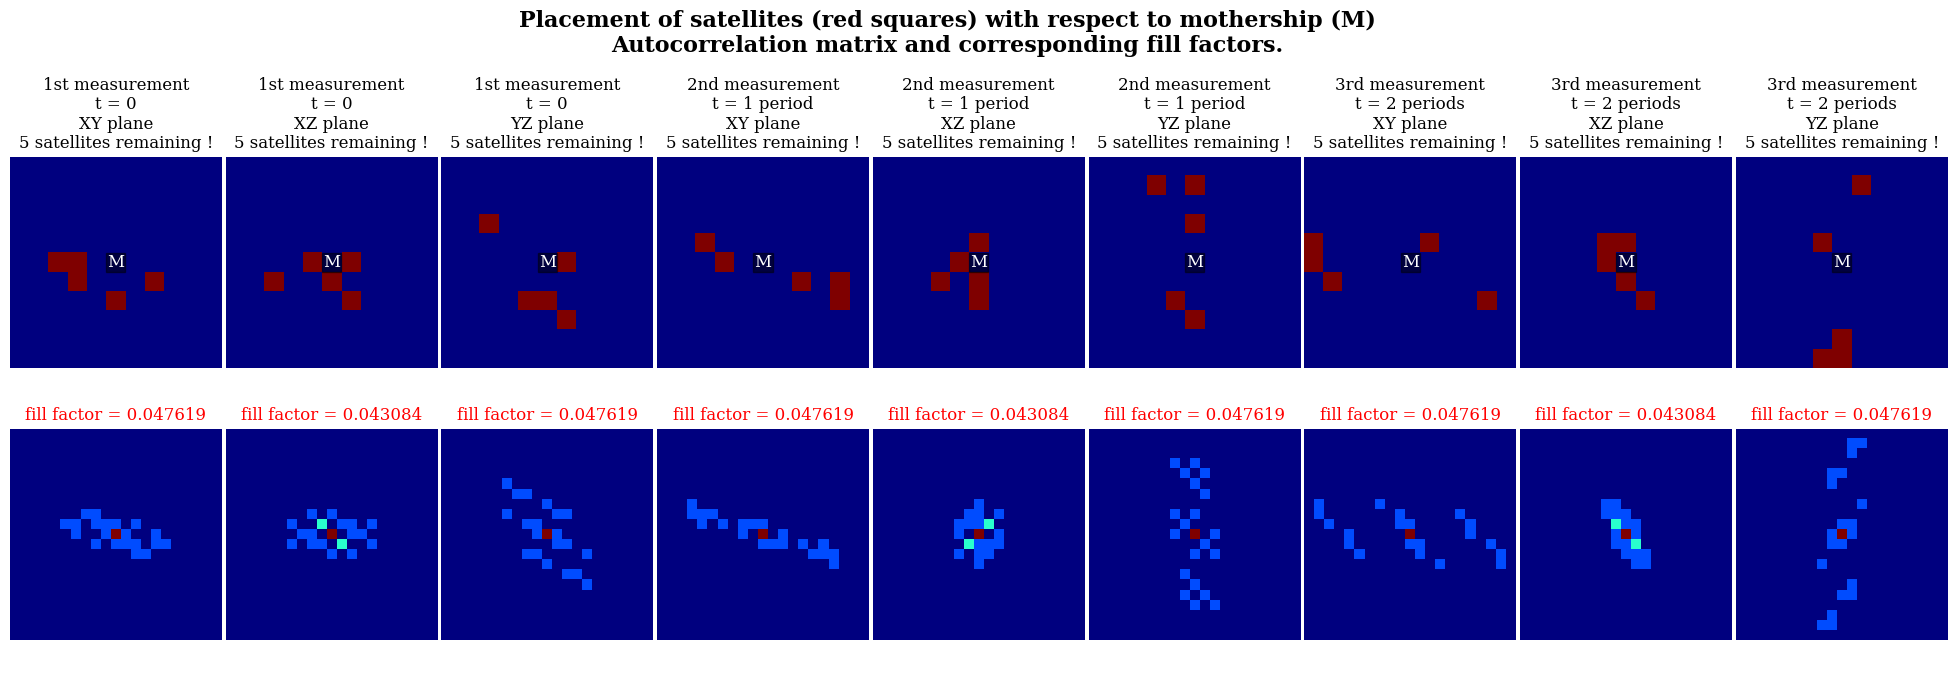

---

XY


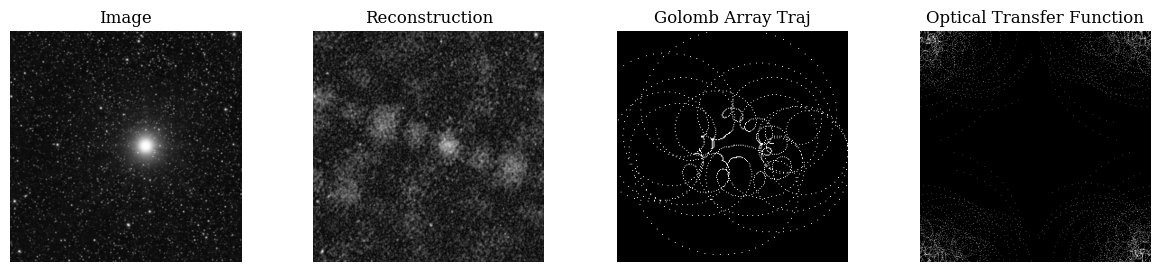

XZ


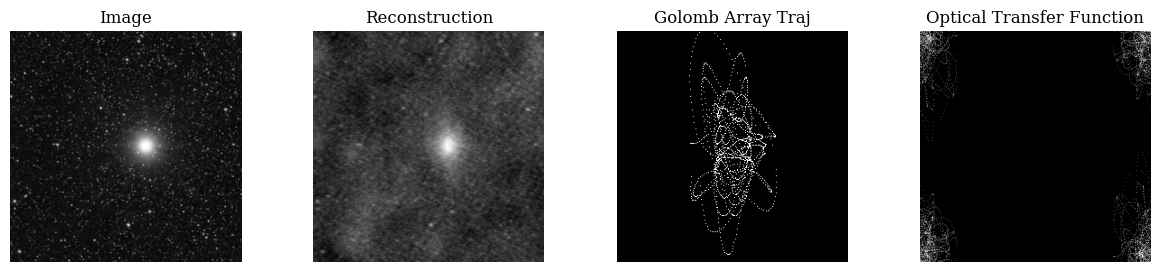

YZ


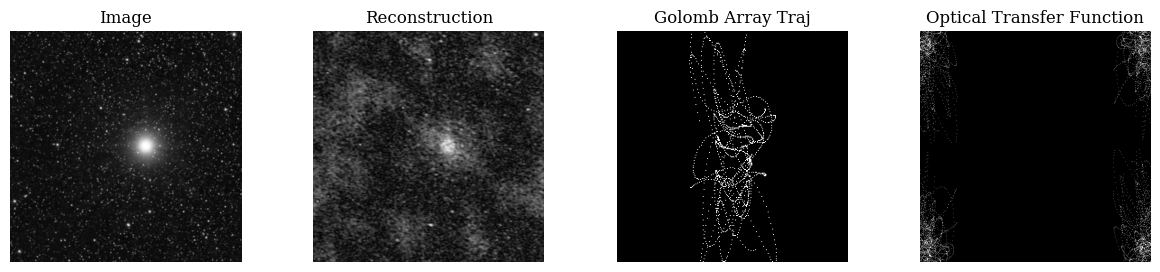

---

XY


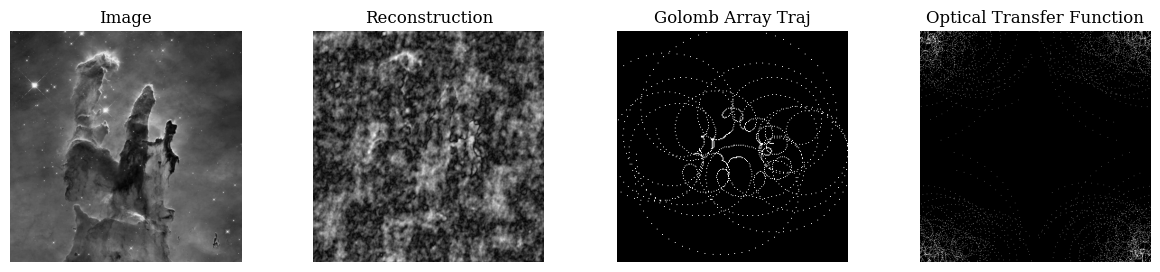

XZ


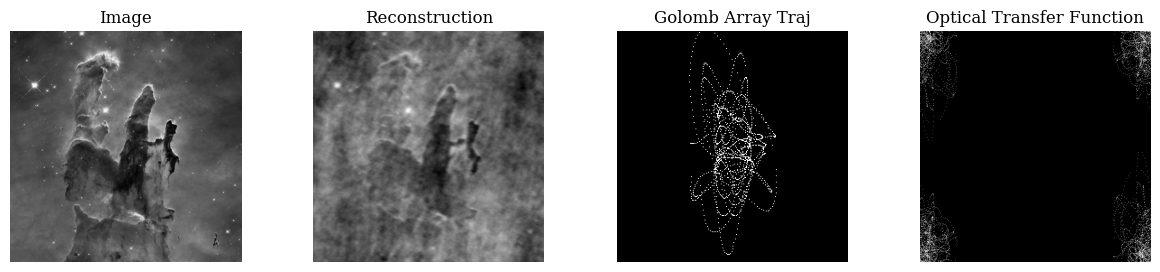

YZ


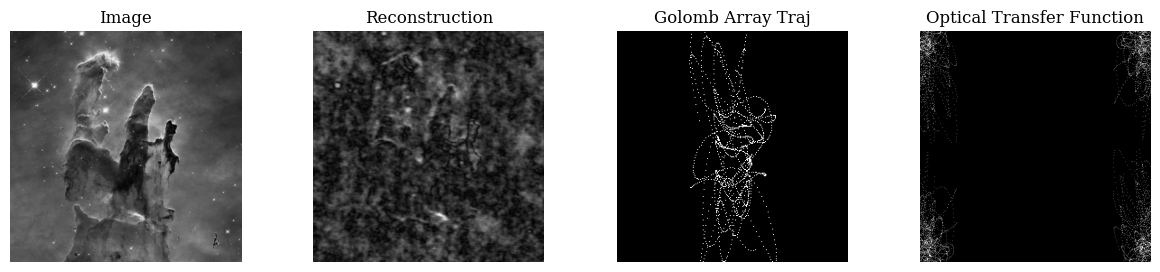

In [11]:
UDP = init_simple_problem()
img = "../data/star.jpg"
# Classe per il problema di ottimizzazione con NSGA-II
class GolombOptimization(Problem):
    def __init__(self, udp):
        super().__init__(n_var=udp.n_sat * 6,  # numero di variabili: posizioni e velocità
                         n_obj=1,              # un solo obiettivo
                         n_constr=0,           # nessun vincolo
                         xl=-0.5,              # limite inferiore
                         xu=0.5)               # limite superiore
        self.udp = udp

    def _evaluate(self, x, out, *args, **kwargs):
        """
        Calcola il fitness per ogni soluzione
        """
        fitness_values = []
        for solution in x:
            fitness = self.udp.fitness(solution)[0]  # Utilizziamo la funzione di fitness preesistente in UDP
            fitness_values.append(fitness)
        out["F"] = np.array(fitness_values).reshape(-1, 1)  # Restituisce il fitness

def run_and_display_nsga2(udp, n_generations=100, population_size=100, image_path=img):
    """
    Configura, esegue l'algoritmo NSGA-II e visualizza i risultati
    """
    # Configura il problema
    problem = GolombOptimization(udp)

    # Configura l'algoritmo NSGA-II
    algorithm = NSGA2(
        pop_size=population_size,
        crossover_probability=0.9,  # Aumentiamo la probabilità di crossover
        mutation_probability=0.2,   # Probabilità di mutazione
        mutation_type="polynomial",  # Tipo di mutazione
        crossover_type="uniform",   # Tipo di crossover
        eliminate_duplicates=True   # Elimina duplicati per migliorare la diversità
    )

    # Condizioni di terminazione
    termination = ('n_gen', n_generations)

    # Esegui l'ottimizzazione
    res = minimize(problem, algorithm, termination, seed=1, verbose=True)

    # Visualizza tutte le soluzioni trovate
    print("\nTutte le soluzioni trovate (Fronte di Pareto):\n")
    for i, (sol, fit) in enumerate(zip(res.X, res.F)):
        print(f"Soluzione {i + 1}:")
        print(f"X = {sol}")
        print(f"Fitness = {fit[0]:.4f}\n")

    # Seleziona la migliore soluzione
    best_solution_idx = np.argmax(-res.F[:, 0])
    best_solution = res.X[best_solution_idx]
    best_fitness = -res.F[best_solution_idx, 0]

    print("\nMigliore soluzione trovata:")
    print(f"X = {best_solution}")
    print(f"Valore fitness = {best_fitness:.4f}")

    # Visualizza i risultati con print_result
    print_result(udp, best_solution, 300, show_simulated_reconstruction=True)

    # Visualizza il fronte di Pareto
    plot = Scatter()
    plot.add(res.F, label="Fronte di Pareto")
    plot.show()

# Esegui il codice principale
if __name__ == "__main__":
    # Esegui l'ottimizzazione e visualizza i risultati
    run_and_display_nsga2(UDP, n_generations=200, population_size=100)


MULTI OBIETTIVO

Evoluzione in corso...


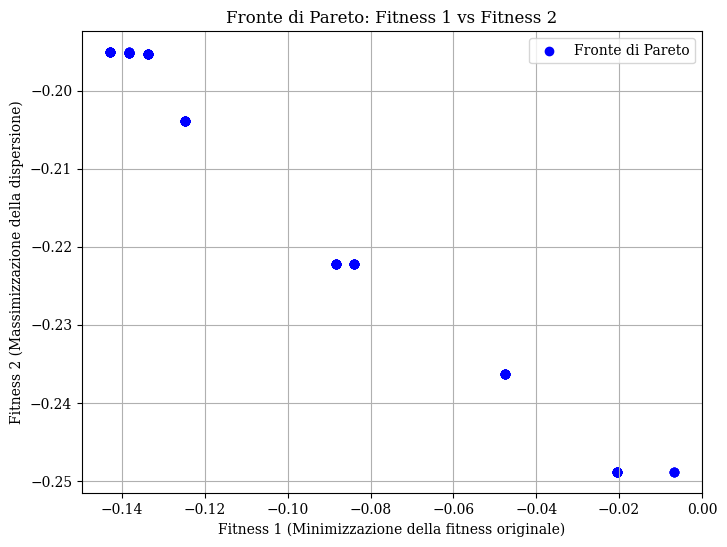


Migliore soluzione trovata:
X = [-0.22063706 -0.18168216  0.01469406  0.08304475  0.17648494 -0.0952978
  0.49997936 -0.4999882   0.4999823  -0.0260604  -0.07971791  0.37775012
 -0.49999886 -0.36360444  0.49998876  0.38368051 -0.0239597  -0.41460736
  0.49995235  0.49999743 -0.49997756 -0.49711374  0.09652513  0.16620499
  0.49999388 -0.49996521  0.49998785  0.20152201 -0.47770512 -0.49236327]
Fitness 1 = -0.1429
Fitness 2 = -0.1951
Solution:  [-0.22063706 -0.18168216  0.01469406  0.08304475  0.17648494 -0.0952978
  0.49997936 -0.4999882   0.4999823  -0.0260604  -0.07971791  0.37775012
 -0.49999886 -0.36360444  0.49998876  0.38368051 -0.0239597  -0.41460736
  0.49995235  0.49999743 -0.49997756 -0.49711374  0.09652513  0.16620499
  0.49999388 -0.49996521  0.49998785  0.20152201 -0.47770512 -0.49236327]
Fitness:  [-0.14285714285714285]


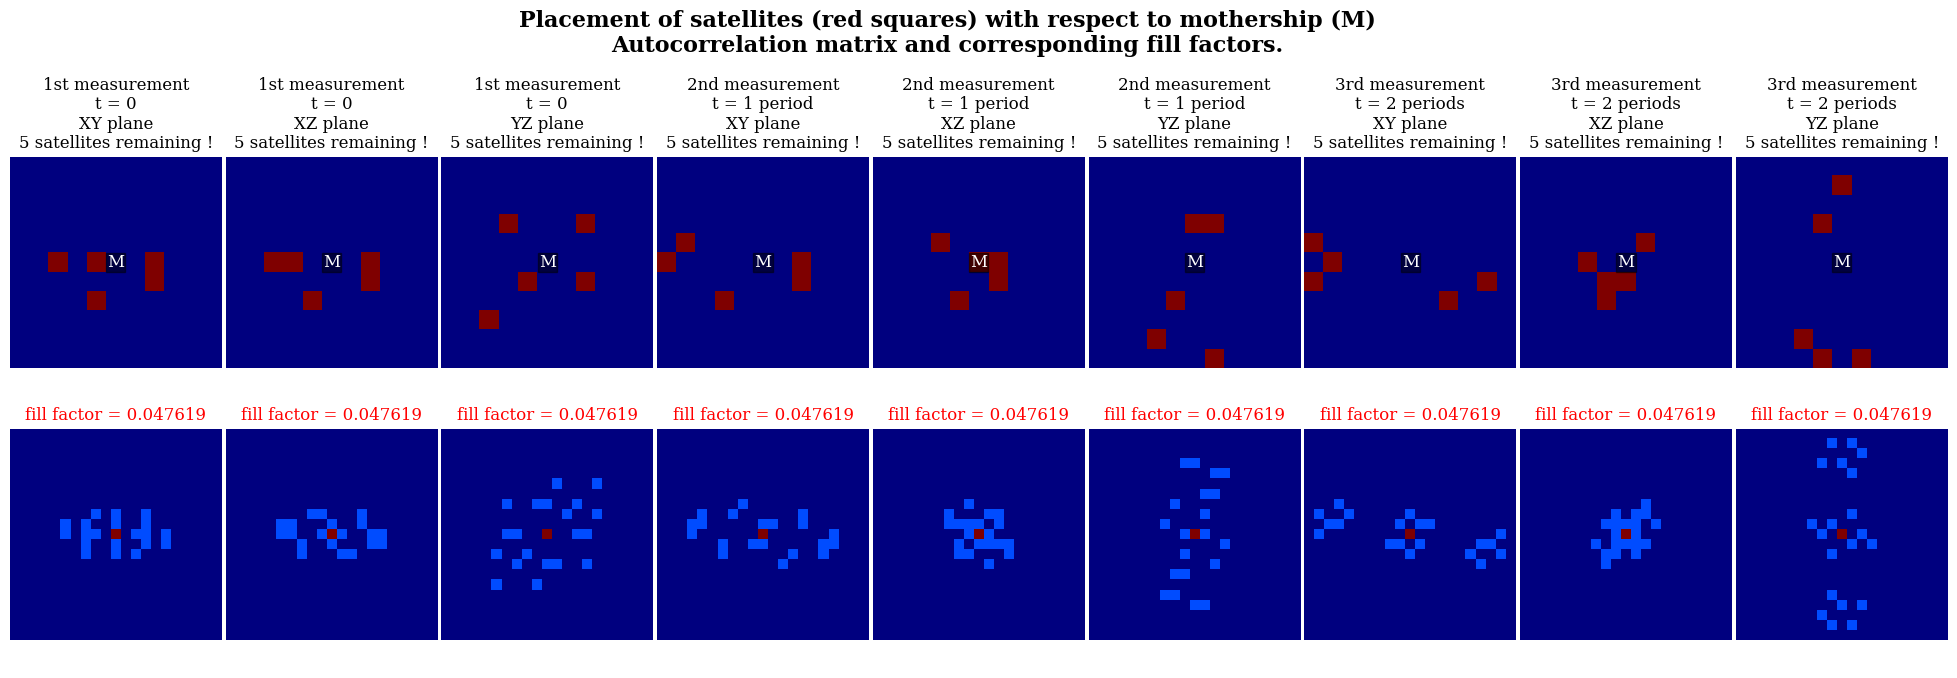

---

XY


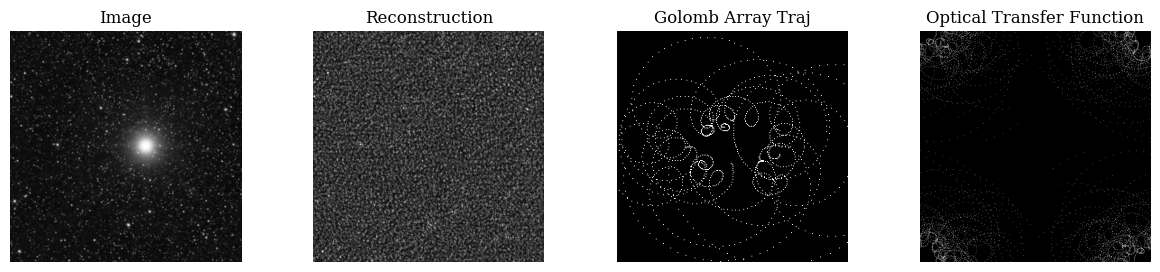

XZ


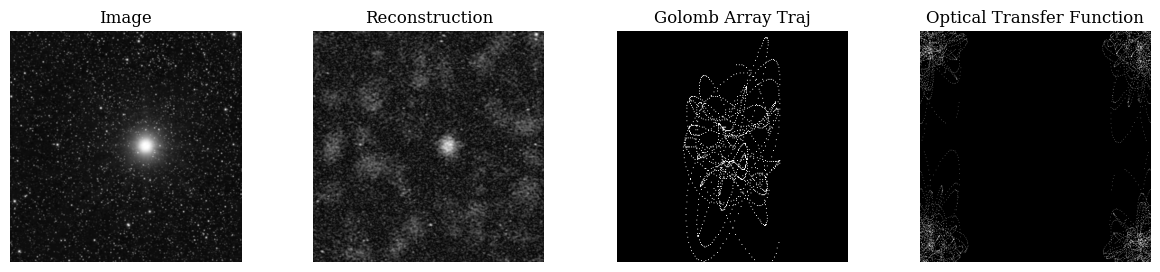

YZ


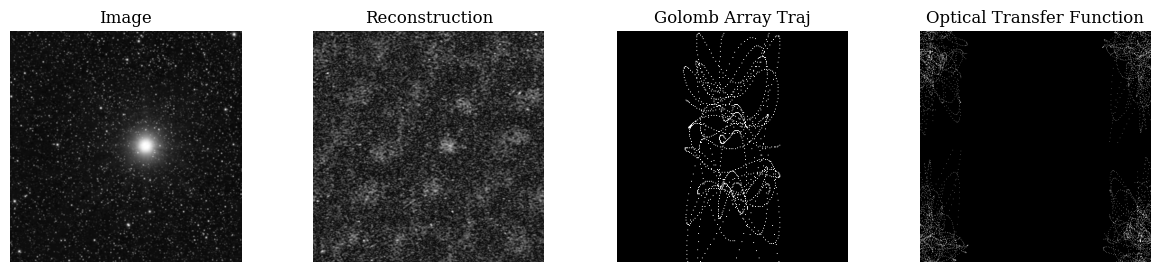

---

XY


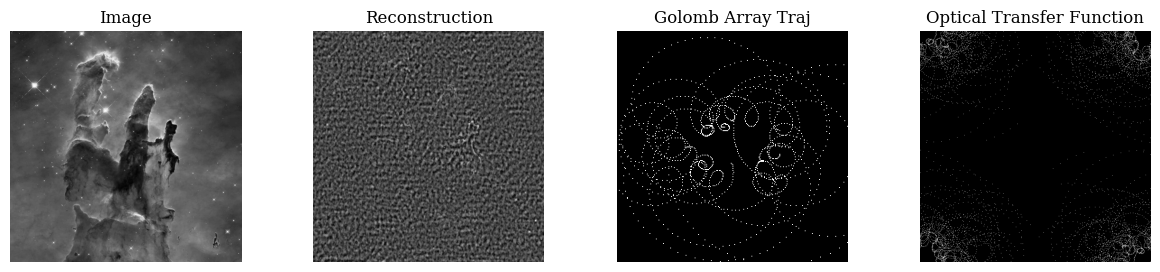

XZ


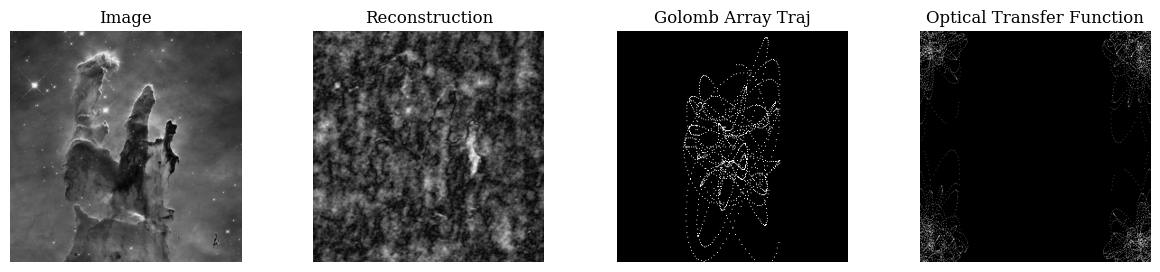

YZ


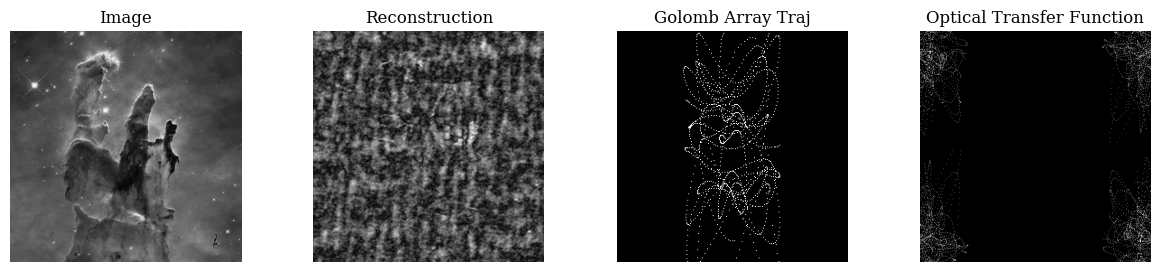

In [12]:
import pygmo as pg
import numpy as np
import matplotlib.pyplot as plt

# Inizializza il problema UDP
UDP = init_simple_problem()
img = "../data/star.jpg"

# Classe per il problema di ottimizzazione con NSGA-II
class GolombOptimization:
    def __init__(self, udp):
        """
        Costruttore del problema.
        udp: Problema esistente da ottimizzare.
        """
        self.udp = udp
        self.n_var = udp.n_sat * 6  # Numero di variabili: posizioni e velocità
        self.n_obj = 2  # Multi-obiettivo
        self.bounds = ([-0.5] * self.n_var, [0.5] * self.n_var)  # Limiti variabili

    def fitness(self, x):
        """
        Calcola la fitness:
        - Obiettivo 1: Minimizzazione della fitness originale (problema UDP)
        - Obiettivo 2: Massimizzazione della dispersione (varianza negativa delle posizioni)
        """
        f1 = self.udp.fitness(x)[0]  # Fitness originale
        positions = np.array(x).reshape(-1, 6)[:, :3]  # Posizioni XYZ
        f2 = -np.var(positions)  # Varianza negativa delle posizioni
        
        return [f1, f2]

    def get_bounds(self):
        return self.bounds

    def get_nobj(self):
        return self.n_obj

def run_and_display_nsga2(udp, n_generations=100, population_size=100, image_path=img):
    """
    Configura, esegue l'algoritmo NSGA-II e visualizza i risultati.
    """
    # Configura il problema
    problem = pg.problem(GolombOptimization(udp))

    # Configura l'algoritmo NSGA-II
    algorithm = pg.algorithm(pg.nsga2(gen=n_generations))

    # Inizializza la popolazione
    population = pg.population(problem, size=population_size)

    # Esegui l'ottimizzazione
    print("Evoluzione in corso...")
    population = algorithm.evolve(population)

    # Ottieni i risultati
    pareto_fitness = population.get_f()
    pareto_vectors = population.get_x()

    # Visualizza il fronte di Pareto
    plot_pareto_front(pareto_fitness)

    # Seleziona la migliore soluzione (in base al primo obiettivo)
    best_solution_idx = np.argmin(pareto_fitness[:, 0])
    best_solution = pareto_vectors[best_solution_idx]
    best_fitness = pareto_fitness[best_solution_idx]

    print("\nMigliore soluzione trovata:")
    print(f"X = {best_solution}")
    print(f"Fitness 1 = {best_fitness[0]:.4f}")
    print(f"Fitness 2 = {best_fitness[1]:.4f}")

    # Visualizza i risultati con print_result
    print_result(udp, best_solution, 300,show_simulated_reconstruction=True)

def plot_pareto_front(pareto_fitness):
    """
    Visualizza il fronte di Pareto.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(pareto_fitness[:, 0], pareto_fitness[:, 1], color='blue', label='Fronte di Pareto')
    plt.title("Fronte di Pareto: Fitness 1 vs Fitness 2")
    plt.xlabel("Fitness 1 (Minimizzazione della fitness originale)")
    plt.ylabel("Fitness 2 (Massimizzazione della dispersione)")
    plt.grid()
    plt.legend()
    plt.show()

# Esegui il codice principale
if __name__ == "__main__":
    run_and_display_nsga2(UDP, n_generations=300, population_size=100, image_path=img)
